# Final Thesis Project - Training Data

This Notebook tests out different ML models and check the scores. 

The training dataset contains a total of 696 samples. 

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [2]:
import os
print(os.getcwd())

C:\Users\edward.luca\Github\PlethMachineLearning


In [3]:
# Loading Data
data_train = np.load('data_train_type2.npy', allow_pickle=True)
labels_train = np.load('labels_train_type2.npy', allow_pickle=True)

print(data_train.shape, labels_train.shape)

(696, 17) (696,)


In [4]:
'''
# Loading Data
napoli_test = np.load('napoli_data.npy', allow_pickle=True)
labels_test = np.load('napoli_labels.npy', allow_pickle=True)

#print(da_train.shape, labels_train.shape)
'''

"\n# Loading Data\nnapoli_test = np.load('napoli_data.npy', allow_pickle=True)\nlabels_test = np.load('napoli_labels.npy', allow_pickle=True)\n\n#print(da_train.shape, labels_train.shape)\n"

In [5]:
# Labels Encoding

labels_names = []

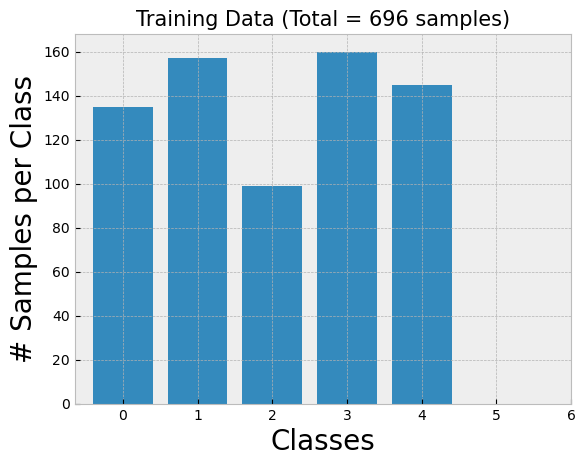

In [6]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[0])+' samples)',size=15);



In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from skimage.transform import resize
from sklearn.svm import SVC
#from sklearn.metrics import roc_curve, roc_auc_score
#import cv2

In [8]:
X_train, X_test, t_train, t_test = train_test_split(data_train, labels_train, 
                                                   test_size=0.2,
                                                   stratify=labels_train,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(556, 17)
(556,)
(140, 17)
(140,)


In [9]:
'''
X_napoli_train, X_napoli_test, t_napoli_train, t_napoli_test = train_test_split(napoli_test, labels_test, 
                                                   test_size=0.5,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)
'''

'\nX_napoli_train, X_napoli_test, t_napoli_train, t_napoli_test = train_test_split(napoli_test, labels_test, \n                                                   test_size=0.5,\n                                                   random_state=0)\nprint(X_train.shape)\nprint(t_train.shape)\nprint(X_test.shape)\nprint(t_test.shape)\n'

---

## 1.) LDA + LOGISTIC REGRESSION (Model No.1)

In [10]:
mod1 = Pipeline([('SCALER', StandardScaler()),
                 ('LDA', LDA(n_components=3)),
                 ('LOGRES', LogisticRegression())])
mod1.fit(X_train, t_train)

Pipeline(steps=[('SCALER', StandardScaler()),
                ('LDA', LinearDiscriminantAnalysis(n_components=3)),
                ('LOGRES', LogisticRegression())])

In [11]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'LDA__n_components': [2, 3, 4, 5, 6],  # Test different number of components for LDA
    'LOGRES__penalty': ['l1', 'l2'],  # Test different regularization penalties
    'LOGRES__C': [0.1, 1.0, 10.0, 100.0, 1000.0],  # Test different values of regularization strength
    'LOGRES__solver': ['liblinear', 'saga']  # Test different solvers
}

grid_search = GridSearchCV(mod1, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use best model found
lda_best_model = grid_search.best_estimator_

C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\e

Best Parameters: {'LDA__n_components': 3, 'LOGRES__C': 1.0, 'LOGRES__penalty': 'l2', 'LOGRES__solver': 'liblinear'}


C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
 

In [12]:
#pred_test1 = mod1.predict(X_napoli_test)

In [13]:
# Make predictions on test set
pred_test1 = lda_best_model.predict(X_test)

print('LDA + LR:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test1))
print ('F1_score:\n',f1_score(t_test, pred_test1, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test1))

LDA + LR:
Training Accuracy: 
  0.4928571428571429
F1_score:
 [0.57627119 0.47222222 0.73684211 0.56       0.        ]
Confusion matrix:
[[17  5  0  4  1]
 [ 2 17  2  9  2]
 [ 0  0 14  3  3]
 [ 8  2  0 21  1]
 [ 5 16  2  6  0]]


In [14]:
'''
print('LR\n')
print('Accuracy:\n',accuracy_score(t_napoli_test, pred_test1))
print ('F1_score:\n',f1_score(t_napoli_test, pred_test1, average=None))
print('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test1))
'''

"\nprint('LR\n')\nprint('Accuracy:\n',accuracy_score(t_napoli_test, pred_test1))\nprint ('F1_score:\n',f1_score(t_napoli_test, pred_test1, average=None))\nprint('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test1))\n"

## 2.) PCA + LOGISTIC REGRESSION (Model No. 2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64),)
0.9999999999999999


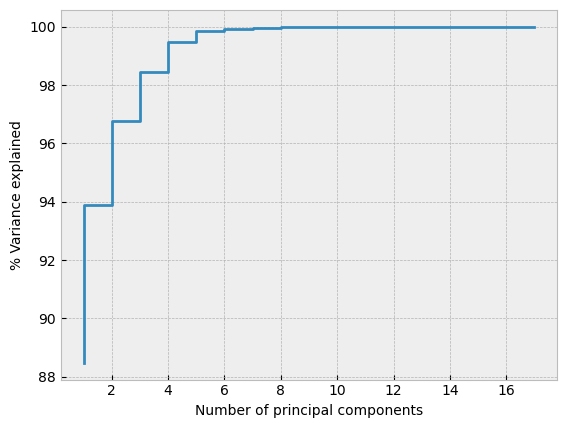

In [16]:
N, D = np.shape(X_train)
pca = PCA(n_components=min(N,D))
pca.fit(X_train)

plt.step(range(1,min(N,D)+1),np.cumsum(pca.explained_variance_ratio_)*100)

print(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9))
print(np.cumsum(pca.explained_variance_ratio_)[16])
plt.xlabel('Number of principal components');
plt.ylabel('% Variance explained');

In [17]:
mod2 = Pipeline([('SCALER', StandardScaler()),
                 ('PCA', PCA(n_components=17)),
                 ('LOGREG', LogisticRegression(random_state=0, tol=0.01))]) 
mod2.fit(X_train, t_train)

Pipeline(steps=[('SCALER', StandardScaler()), ('PCA', PCA(n_components=17)),
                ('LOGREG', LogisticRegression(random_state=0, tol=0.01))])

In [18]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'PCA__n_components': [10, 12, 15, 17, 19],  # Test different number of components for PCA
    'LOGREG__penalty': ['l1', 'l2'],  # Test different regularization penalties
    'LOGREG__C': [0.1, 1.0, 10.0, 100.0, 1000.0],  # Test different values of regularization strength
}

# Create a pipeline with standard scaler, PCA, and Logistic Regression
mod2 = Pipeline([
    ('SCALER', StandardScaler()),
    ('PCA', PCA(n_components=19)),
    ('LOGREG', LogisticRegression(random_state=0, tol=0.01))
])

grid_search = GridSearchCV(mod2, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
pca_best_model = grid_search.best_estimator_

C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Best Parameters: {'LOGREG__C': 1000.0, 'LOGREG__penalty': 'l2', 'PCA__n_components': 12}


C:\Users\edward.luca\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Make predictions on test set
pred_test2 = pca_best_model.predict(X_test)

print('PCA + LR:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test2))
print ('F1_score:\n',f1_score(t_test, pred_test2, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test2))


PCA + LR:
Training Accuracy: 
  0.5428571428571428
F1_score:
 [0.59375    0.4516129  0.76923077 0.60869565 0.30434783]
Confusion matrix:
[[19  3  0  2  3]
 [ 5 14  3  5  5]
 [ 1  0 15  4  0]
 [ 8  1  0 21  2]
 [ 4 12  1  5  7]]


In [20]:
'''
pred_test2 = mod2.predict(X_napoli_test)

print('Accuracy:\n',accuracy_score(t_napoli_test, pred_test2))
print ('F1_score:\n',f1_score(t_napoli_test, pred_test2, average=None))
print('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test2))
'''

"\npred_test2 = mod2.predict(X_napoli_test)\n\nprint('Accuracy:\n',accuracy_score(t_napoli_test, pred_test2))\nprint ('F1_score:\n',f1_score(t_napoli_test, pred_test2, average=None))\nprint('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test2))\n"

## 3.) Random Forest (Model No. 3)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [23]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'n_estimators': [50, 150, 250],  # Number of trees in the forest
    #'max_depth': [None, 20, 40],  # Maximum depth of the trees
    #'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 4, 10],  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
rf_best_model = grid_search.best_estimator_

Best Parameters: {'n_estimators': 150}


In [24]:
# Make predictions on test set
pred_test3 = rf_best_model.predict(X_test)

print('RF:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test3))
print ('F1_score:\n',f1_score(t_test, pred_test3, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test3))

RF:
Training Accuracy: 
  0.8
F1_score:
 [0.83018868 0.76190476 0.87179487 0.7826087  0.78571429]
Confusion matrix:
[[22  2  0  1  2]
 [ 1 24  1  5  1]
 [ 0  0 17  3  0]
 [ 2  0  1 27  2]
 [ 1  5  0  1 22]]


In [25]:
'''
pred_test3 = rf_classifier.predict(X_napoli_test)

print('With Random Forest:')
print('Test Accuracy Score = ',accuracy_score(t_napoli_test, pred_test3))
print('Confusion matrix:')
print(confusion_matrix(t_napoli_test, pred_test3))
'''

"\npred_test3 = rf_classifier.predict(X_napoli_test)\n\nprint('With Random Forest:')\nprint('Test Accuracy Score = ',accuracy_score(t_napoli_test, pred_test3))\nprint('Confusion matrix:')\nprint(confusion_matrix(t_napoli_test, pred_test3))\n"

## 4.) XGBoost (Model No.4)

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
import seaborn as sns
from tkinter import *

In [27]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=0)

In [28]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'n_estimators': [50, 150, 250],  # Number of trees
    #'max_depth': [3, 5, 7],  # Maximum depth of a tree
    #'learning_rate': [0.01, 0.2, 0.4],  # Learning rate
    #'gamma': [0, 0.2, 0.4],  # Minimum loss reduction required to make a further partition
    #'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
xgb_best_model = grid_search.best_estimator_

Best Parameters: {'n_estimators': 50}


## Feature Importance for XGB model

       Feature  Importance
16       Phase    0.150252
10  EIP (msec)    0.126777
14          RH    0.104009
0    Ti (msec)    0.070191
4           TV    0.066716
2          PIF    0.066092
13        EF50    0.065477
1    Te (msec)    0.058977
8     P (msec)    0.053668
7           MV    0.043053
5           EV    0.038404
6    RT (msec)    0.034291
11  EEP (msec)    0.032248
15          Sr    0.031556
3          PEF    0.029967
12        Penh    0.028324
9      f (bpm)    0.000000


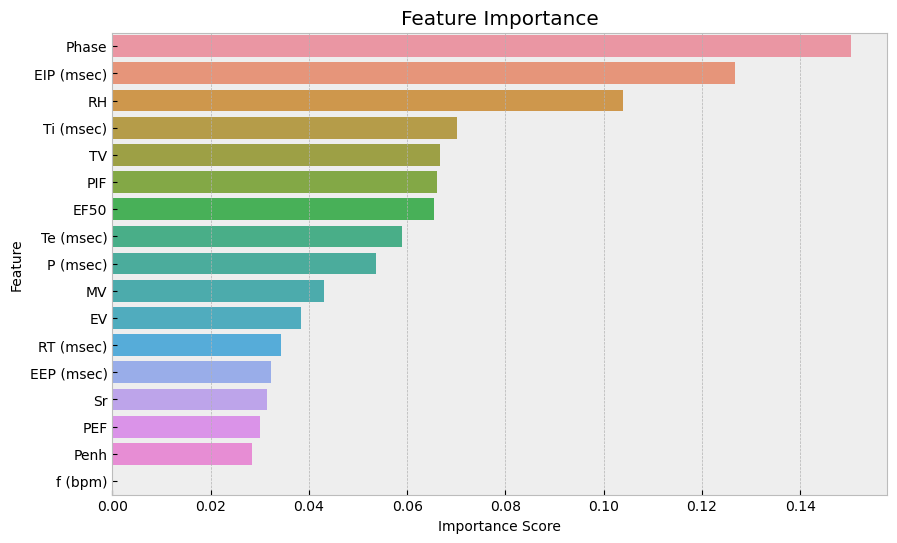

In [30]:
# Get feature importance scores XGBoost model
feature_importance = xgb_best_model.feature_importances_

# Column Names
column_names = ['Ti (msec)', 'Te (msec)', 'PIF', 'PEF', 'TV', 'EV', 'RT (msec)', 'MV', 'P (msec)', 'f (bpm)', 'EIP (msec)', 'EEP (msec)', 'Penh', 'EF50', 'RH', 'Sr', 'Phase']


# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

<Figure size 10000x10000 with 0 Axes>

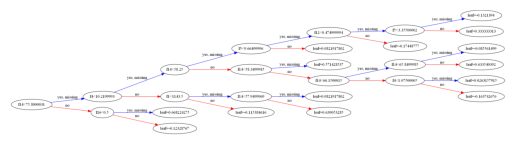

<Figure size 10000x10000 with 0 Axes>

In [31]:
#Instance of Tkinter frame
#win = Tk()
#win.geometry("700x700")
#plot_address = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgMAAAB6CAYAAAAiaVB3AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAABc/UlEQVR4nO29d3Rc13mv/Qymz2A6ZtAbCYAFAHsvoholmiqUKMmWrEi2XBLHSXxdrteNfXPzLd/45trXiZ1lJ3JWokSyLCmWZRXbonoXe+8kSKJ3YGYwvc+c74+jcwhQrBI797PWrAEGgzOnzX5/e+93/16NJEkSAoFAIBAIrlmKLvUOCAQCgUAguLQIMSAQCAQCwTWOEAMCgUAgEFzjCDEgEAgEAsE1jhADAoFAIBBc4wgxIBAIBALBNY4QAwKBQCAQXOMIMSAQCAQCwTWOEAMCgUAgEFzj6C71DggEAoFAcDkw3pA3n8+TTqfJZDKk02kikQiJRIJUKqW+ns1mSafTZLNZ8vk8kiSRz+cB0Ol06rPBYMBgMKDX6zEajRiNRkwmE8XFxdhsNvXvRqMRjUaj7sP4ny80GmFHLBAIBIJrCSXs5XI5YrEYo6OjjIyM4Pf7GRsbI51Ok8/n1UBuNBpxOBxYLBZMJhNGo1EN7srz+OCviAJJksjlcmQyGVU8ZDIZVVBEo1Gi0aj690KhgF6vx2w2U1JSQklJCT6fD6fTidVqRavVAhdGJAgxIBAIBIKrGkmSkCSJSCRCT08PXV1dDA0NkcvlJgRer9eLx+NRg71Wq71ovXNJklSxkEwmCQQCBINB+vv7CQQC5HI5iouLqaqqoq6ujvLyciwWC3B+xIEQAwKBQCC46lB65X19fezbt4/+/n4MBgPV1dXU1NRQXl6u9rYv5nD8J0ERCtFolP7+ftrb2xkYGECv19PY2EhzczMlJSVoNJpPfCxCDAgEAoHgqkEZAdi0aRPHjh3D5/MxY8YMampqMJvNl33gP1sKhQKRSISjR4+yf/9+MpkMc+bMYcaMGRgMhnM+TiEGBAKBQHDFI0kS6XSad999l87OThYuXMj06dMxmUwfC4ySJJFMJk8pDvL5POFwGIfDoc7Tj/9fBY1Gw8UMoacK8JIkEQqF2LZtG21tbSxbtoyZM2dSVHT2CwaFGBAIBALBFY0yGvD0008zY8YMFi5ciF6vP+X7g8EgP/7xj/n7v//7kwbM3//+91gsFmbOnElpaemEzxkcHOTQoUPU1NTQ0NAAwI4dOxgdHeWWW27hyJEjbNmyhTVr1rBz507i8Tg33HAD27Ztw2QyMXXqVH74wx+SyWT4m7/5G/bs2cPevXv58z//c/bt28fY2Bi33HILf/jDHxgcHOSRRx7hj3/8IwsWLKC+vv6M5yEWi/Hqq6+i1WpZs2aNmth4JoTPgEAgEAguGqOjo0Sj0Y+9Ho/HGR4e/kTblCSJF154gZtvvpmlS5eeVggAmEwmAoEA6XSat99+m5dffpktW7bwr//6r6xfv57/+I//YHBwkD179vDGG2/w/vvvk81mkSSJF198kWnTpvHCCy+Qy+UAKCoqYseOHQBUVVVx7Ngxdu/eTUdHB1arlXfffZdkMsmhQ4cwm818//vf56GHHsLhcHD48GGmT5+OXq9n7ty57Nmzh2QyybFjx5g2bRpGo5Hu7m5GRkbOeB40Gg02m417770Xs9nMxo0bz3rkQogBgUAgEJwVuVyO/v5+kskkfr+fdDpNIBAgm80Si8WIRCLqOntJkshkMsRiMcLhMJFIhHQ6TaFQUIfpw+EwyWSSUChEIpGgUCiQTCaJRqPEYjHy+Tx+v59cLnfaoBaPx8nlcjQ2Np7TXPmhQ4f4wx/+QEdHB4VCgXA4THd3N5MmTaK5uZlQKEQoFCISibB+/Xq+973vqQF9ZGSEXC6HRqNRxYdWq6VQKOByudTzNDIygs1mU99jNpsxm824XC5MJhMPPfQQoVCITCZDIBDglltuwWq18sgjjzAwMEAulzvr3r1CUVERy5Yto62t7az/R5gOCQQCgeCsyOVyPPHEE9x+++1qdn5HRwdarZaysjJSqRQrVqygpKQEgKeffhqbzcbOnTtZuXIlx44dI5VKsWDBAsbGxpAkibGxMWpqali3bh11dXUMDw+zZMkSNm/ezPTp0wE4cOAA3/nOd9SldCdiNBpJp9MkEgmsVusZjyOdThOPx7FYLORyORoaGti8eTMGg4FkMsnY2Bg6nY5bb70VkIOrwWBg3rx5fPDBBxw9epSFCxcSCoXI5XIEAgHC4TDBYJC+vj7mzp2LJEnMnTuXwcFBFi1axEsvvUQwGCSXyzE8PExZWRmxWIxYLMbSpUtJpVL8+te/xmazYbPZsFgsLFu2TD1HgUAASZLOSuxIkqSKkLNFiAGBQCAQnBUmk4l7772XN954g1WrVvHMM8/Q2NhIfX09hw4dUtfCK714xXEvEAjgdrtpb2+nurqaVCpFIpGgu7ubmTNnsmHDBpqamvD7/WrPuquri6VLlzI8PMzkyZMxm80f2x9Jgn37IJvVM23aUp5++r+4//7PYrPZThs0tVotX//616mtreXb3/42JpOJuXPnqm6CjY2NmM1m7Hb7hO0YjUZuueUWOjs7ueOOO0in0+h0OtxuN3feeScajYZsNsuUKVOwWq2MjIywfPlyioqKaGxspK6ujkKhgNfrpbi4mEQiQTQapaGhgWQyyfz589FqtbjdbkZHR2loaCCXy7Fq1SosFstZiQFJkujp6WHdunU8+OCDZ31tRQKhQCAQXETOpcm9HJfB5XI5HnvsMT7/+c9z6NAhnnnmGdasWcPw8DAej4dCocCUKVOoq6vj0UcfxWAwsGHDBu666y7eeecdSktLmTZtGqlUipKSEkZGRqioqGDv3r0EAgFSqRSLFy/mpZdeYvXq1bzyyitMmTKFb33rWx8FxOP7IknwD/8AP/gBVFVJGI3HqKrq5q/+qoEbbij7mL3v1YyyouCDDz5gdHSUNWvWqN4DZ4MQAwKBQPApUZpRxRwmkUioc99jY2Mkk0nVglZxmctmsxQKBXUOXTG/0Wq1E7zsTSYTJpMJm82G0+nEYrFgsVgwm80TMuEvRtArFAq888472Gw2FixYAMhD7nq9Xs0VUIbY3W43qVQKSZIoFArqfLpGo6GoqIiioiIkSaKoqEg9B8o2NJoiUqk0hw8fo7jYSm9vEo9nCsmklWgUYjFIJiGfhw0b4MknQaOBigq4//4CS5bsob9/A/X1dcyZM4fS0lKKioquKmGg3HOZTIbu7m62bdtGJBJh8eLFtLS0nLOZkhADAoFAcA4o1rapVAq/309PTw8jIyMEg0EymQxwPEnMZrPhcrnU35UgbzAY0Ol0FBUVqY32eC97RTAoRXIUYaEk2iWTSTKZDFqtFpvNhtfrpby8nLKyMhwOh5qsdr6DnyRJdHR0UFVVhdFoPOl7lIA//rNP7M3n85BIyI9YDAIBCIVQA306DbmcRCIRQKMZpry8Hp/PjNutobgYHA6w2UCvh7ffhu98Bx54AP7kT6C2FoqKZM+BY8eOsWvXLmKxGD6fj6amJmpraykuLlb370oRCEqozufzjI2N0dXVxdGjRwkGg1RWVjJ37lwqKio+saOiEAMCgUBwGpTgH4/HaW9v5+jRo4yOjqLX63G73VRWVqq+9iaTSQ3yFzLIKKIhl8sRjUbx+/309fUxMDBALBbDYrFQU1NDU1MTZWVlF0wcyPty/FmSIJWCeFwO9KGQHOhjMTnQx+OQy8m9eKMRTCaw28HjkZ9tNjnQG42g04FWK7/3dLsdicif5fPByTx2FDOivr4+jhw5Qn9/P5lMBpfLRVlZGVVVVXg8Hmw2Gzqd7pKLhPGjTEq1xOHhYfr7+xkaGiKRSFBcXEx9fT0NDQ14vd4J+/1JEWJAIBAIToIkSUSjUfbu3cvBgwfRaDTU1tbS0NBAeXk5RqPxnBzeLgaKSIhGo/T09HDw4EECgQBlZWXMnTuXmpqas+45nhjkczk5mCeTcmAfHZWflUc2C4WCHMTNZrBaweWSH0qgt1rlv+t0cuC+FPG2UCiQyWQIBoMMDQ3R19dHIBAgmUyi0Wgwm804HA51VMfpdGI2mzGZTOqozqnO4cmcDk9EuUZKGeRUKkU8HmdsbIxQKEQ0GiUcDpPJZCgqKqK4uBifz0dlZSXl5eUUFxej1+vPu1gRYkAgEAjGIUkSfr+fd955h2AwSGtrKy0tLdjt9ssu+J8JJYehr6+P7du34/f7mT9/PrNmzUKr1QEa8vnjvfl4HILB40P2kYj8t0JB3p7FIj+Ki8HrlQO8zSYHe71e7smfTW/+ckPJV8jlciQSCcLhsJrvEQqF1JyPbDarmg+Nnwo51WjC+F6+8qzkh+h0OoxGIyaTCYvFogoPu92O3W7HaDSqQf9ijFIIMSAQCAQfkc1mee+992hvb+fGG29k0qRJJ+0FKqMGmUwGt9utNthKYz++AT9VEzv+7+Pn2QuFgjrNMH57yuvAGX8+WfBQrGo//PBD9u8Pks+vorjYA2jUAK/05h0O+XebTQ7+SpC/VL35ywHlOo5P+hz/OPF9JxMK45MnL/V0xIkIMSAQCATIS+aee+45PB4PN9xwwynnYRUh8MQTTzB16lT27dvH17/+dXQ6HXv37iWdTrNw4UI0Gg2hUAhJkti3bx+JRIJVq1bx9ttvA7By5UpAFiD/9E//RFNTE9OnT2ffvn2Ul5ezaNEi+vv7ee2111i8eDFtbW3U1tai0+lob29n0qRJFAoFOjs7aWpqwufz8dprrzFv3jyam5tPeZyyv/4ozzzzO2677VYaGyeh1Wqu2SAvkLmyxrwEAoHgArFnzx6sVis333zzGedk169fz9tvv01LSwuHDx8mm83y1ltv0dnZidPppKOjg3379hGNRikuLsZgMNDW1qYuHWxvb1e3pQxJ19XV8bvf/Y6FCxfy8ssvMzY2xtGjRzl48CC//e1vWb58Oc8++yxPPfUU1113HU8//TS/+c1vuP7663nmmWdUt7menp7TehloNBrKy718+csP8Pbbr1IoZIUQEAgxIBAIBABHjx5l7ty5Z8wL0Gg0zJw5k8mTJ1NWVqYO57/11lssWrSIJ554gkQiATBh+aDyvydu3+128xd/8RccPXqURYsWsW3bNux2O21tbapt7vz589m6dSslJSUsWrSIrVu3Ulpayrx589i6dSs+nw+9Xk9tbS1btmw5o7GRRqPB6XRSXFx80qJB5wtlFcbY2BgjIyMUCgWGh4cJBoMXtfSv4MwIO2KBQCAAvF4vvb29VFRUnHZUQJIkBgYGCAQC9Pf3Ew6HGR0dZfny5XR2djJz5kxaWlqQJIlgMEgoFGJwcBC/308qlWJoaIiRkRGSySR9fX3qev3FixcjSRK9vb2qaUwsFkOj0dDc3MzAwACf+9znkCSJvr4+Pve5z5HNZhkYGOC+++5j165deDweWlpazsqyVikudDKb3/PJU089RUlJCVu3buXBBx+kq6uLgYEB7r33XrWGgeDSI3IGBAKBALny3eOPP86tt95KQ0PDKQOqJEl0d3czNjaG2+0mGAzi8/nw+Xz09PRQWVmJyWRS318oFDh69CjpdJrGxka6u7vJZDI0NTWRSqXI5/OkUinKy8sZGBjAbrer3vqZTIbh4WEkScLj8WCxWOjp6cHr9WI2m+np6cHn82Eymejp6UGj0VBRUXHaKneSJJHNZHjhhReoqqpi6bJlFyyJTZIkfvWrX+H1evn973/PkiVLqK6uprOzk8WLF582t0FwcRFiQCAQXNZ0d3fj9Xo/VrEuGAySzWYpLS09L58jSRLhcJjf/e53lJaWcsMNN2C1Wi+bbO/zQT6fp6Ojg60vvEBrfz8t8+dTZLPJSwc8Hnn5QHGx/DAajy8f+IRrBSVJ4pe//CVms5nNmzfzp3/6pxw+fBifz8d11113ShfDK4UTlw6ejPH3z+V8LwkxIBAILhipVIqOjg5qa2sZHR2ltLRUfY5EImqPV6vVqln6imd/Pp/H4XCoFe8Ukxaz2UwikSCdTmM2m9HpdORyOQwGAyaTidHRUbxe7ycqUrNrF7z+epZweBcjI9u58cZWrr9+BmVlxVest71inXzkyBG2bt2KxWLhlptvpsRuRxOPH7cHVAwGYjHZ0i+Tkd2GTCZ5zaHFIq879HiOCwbFRUijOW7/N8GGWDbYUX7W6XQT6hNcbudTWSao3H/xeJxYLEYikSASiRAOh0mlUqpVtGIdnc/n1eWGhY9MGZTjUzwFlIfRaMRgMGA2m3G5XBQXF2OxWLDZbGq9iUtxboQYEAgEF4xkMsmPf/xjHnzwQTo7OwmFQgwPD2M0GiktLSWbzbJ69Wq1POuPfvQjZs+ezZtvvsnNN9/M6OgoR44c4YEHHqCtrQ2DwUAoFKKmpobnn3+ehQsXsnnzZu655x7Wr1+Px+OhqqqKnTt38r3vfU+14T0Til/+O+/AHXdAPi+h0eTxeKI8/PAokyZ9SG1tBc3NzZSWlmIwGC67QKagBKRYLEZnZycHDx7E7/fT0NDAggUL8Hg8p993xXJQkmS3oXT6uGAIh2XRoNgOplLyiZOk4+LAaoWSEnA65Z+Li2VLwqKiiSMNlxhFqMTjcUZHR+nt7WV0dJRwOEwul1PdCJVgbbfbcTqdGI1GNaDrdDr0ej1arVb1o1AKMI0vvqRYRys1J5R6E2NjY6rYiMVipNNpAKxWK06nE5/PR1lZGSUlJVgslgsqEkQCoUAguGCYzWbWrl3Lq6++ytq1a/nHf/xHbr31VsrKytixY8eExhPAYDBgs9kIhUI4HA7279+PTqeb4KQ3depUtmzZQl1dndpou91uhoaGWLhwIYODgyxevPiU8+ZKjEulYGQEenuhu1vuFGcy8kh5NKrhppt0/M3fuJg/30k6XUFHRwebNm3C7/djMpkoKyujrq4On8+H3W6/KDUJJh7H8cI1qVRKTWjs7e0lEAig1+upq6tjxYoVlJaWnn0Bm/HBWquVrQWLi6Gs7MQdOH4ylcpD8bgsEgIBOHr0uIhQvIq12uOiwWY7bmOo/K7XHxcNyr6c3cmQt38aVyTlHhoZGaGtrY3e3l7i8TgWiwWv10tFRQUNDQ1qZciLOXpxoqGRsgJjcHCQ7du3EwwGyefzuN1u6urqmDRpEm63+xMXJToZQgwIBIILyrRp09i+fTter5f77ruP3//+99xxxx24XC68Xi+vv/468+fPp6ysjEwmQ19fH1qtlt7eXlKpFLlcjpGRETQaDa2trQwPDzN//nx27NhBKBRCo9HQ2dmJRqOhr6+P9957j2nTpnHddddhMBiRJDnI+/1y4O/tlTu3hQKUlspV7m6+WR79zuVg3z648Ua45x55ZFyj0aDXFzNjxgxaW1spFApEIhGGhobo6upix44data/1WrFZrPh8XgmDAErFQuV4HI29rXKI5/Pk0wmSSaTxONxtTCR4k+glBB2uVxUVlayZMkSvF6vOnpxwYKZIhqKiuSpAqNRnkaYeEDyc6Eg/5xOH/c9Dofli9LZKYuGeFwWFQAGw/FRBbdb3u54S8Sioom+x4EA/N3fyRdtwQJ5Xz5a8pnJZDh27Bh79uxhbGyMkpISGhsbmTFjBi6Xa8Kyz0uF8tnKCIPT6cTpdFJfX6/eB9lsFr/fT3t7O+vWrSORSFBdXc3s2bOpqKj41MJFTBMIBIILRjab5YUXXqClpYXp06cDxy1zlbnj0dFRNWjm8/kJ1rvjrV2V9fzKM0y0fk0mk+zffwCz2UYkAhZLI11dekZH5Tjk8UB1tfwoKZHjzYkj1krVPZPp7Dql43t0SoGgSCRCMBhUh4AVX/tMJjPBuvZsks6UOWeTyYTJZFLFRklJCQ6HA7vdrs4zXywP+wvCiVMTyiiDUiwhEJB/jkTkSkmSJAsQRTCEw/BXfyVv68Ybkf78z0nMm8eHO3Zw7NgxampqmD17NuXl5ee1N30pUO6bdDpNZ2cnO3bsIBqNMn/+fGbMmPGJixgJMSAQCC4YhUKB0dFRSkpK1B7YeMY3P+fagI0f7h8chK4uif37wwwMRGhsLKeuTk99vTy6LffwL81U9Ym9/fGvnYpTFcC5koPYp2Z8GcVC4XgZxXgcPvgAvvIVyGbJG40MFhczcu+9SA8/TMvs2SfN8cjn8wQCAbxe70nPayqVYmBggKqqKgwGw0cfLecZjLeqVqogKu/J5XJqQFbE7fgCRUpegMFgUO+DoqIi8vm8mmSp/F9RURG5XA6tVntKMyxJkohEImzYsIGuri5Wr15NbW3tOd8rQgwIBIIrAkmSp57HxuQ5/s5OeZ5fo5F7+vX1UFUljygruuNajp3XFBs3wpNPUpg7lz8ODqKbPJmb167FYDKdMigGAgH+9m//lp///OcTgnI2m0Wr1fKf//mfTJ06lebmZjweD5IkcezYMTo7O3G73cydOxeQbayfeuopvve97/Haa68B0NzcTGtrK7/85S+59dZb6ezsBKCxsZGf/exnxONxvv/973P06FG0Wi1z5szhxRdfRKvVsmTJEjo7O9HpdMydO5dDhw7R3d3NZz/72ZMKagWl2ubzzz/PkiVLaG1tPSdBIHIGBALBZYcyYpxKwfCwHPi7u+XR4+JiqKmBJUvk/LOTDfcLrjEWLYJFi2hrayO5Zw/33XffaQMngMlkIpPJEIvFePPNN4nFYlRWVrJnzx5aW1v54x//iNlsxu/3A3Iy7O7du/nyl7/Mo48+SktLC0ajkWPHjlFXV4fJZCKbzaLX67HZbAwNDanFpYLBIBUVFRw4cID/9//+H0eOHGFkZIREIkGhUGD//v3EYjEqKirYu3cvLpeL3t5efD4fc+bMYdu2bWc1mlRSUsJDDz3Ef/7nfzJ58mSsVutZn0IhBgQCwSVHWdoXjUJ/Pxw7JouAXE4e5q+vhxkz5NVqotcv+BgfDaF3dnYya9asMwqB8Rw8eJD169ezcOFCrFYryWSSQCBAXV0d06dPp6OjA5CnFcbGxtBqtaRSKTU433XXXWzZsoXBwUH0ej0Gg4GDBw9iNBpJJpMMDg6q0wr5fJ5MJoPVamV0dFSdPkgmkzgcDtXLwOVyqV4H/f393HbbbWesmQGyILBYLJSXl+P3+4UYEAgElzeSJAf6cBi6uuDIETlPzGKRh/pbWuQM/0s51y+48qisrKStrY2mpqYzBk9lZYbX6yWTyaDRaNi8eTMOh4N4PI7f7yefz7N27Vr1f9xuN3v27GHFihWMjo5iMBgYGBigtrYWl8tFMBikrKwMrVbL5MmTsdlstLS00N/fTyKRYOHCharplsvl4t1330Wn09HS0sKBAwdwOBwsWLCAQCCAy+XCbDbzi1/8ApfLxV/+5V/i8XjOeA4UC2vXiSs7zoDIGRAIBBccZb4/FIKODmhvl3+2WKCuDhoawOeTh/xBBH/BJyOXy/Hss89SVlbGddddd1rTKaXXXlVVRSwWU9+rmASFQiFsNtsEu+tCoYDf78ftdqseF4FAAI/Hg8FgIJVKEYlE1ITZQCCAzWYjnU5TKBSw2+0Tkg0jkQhFRUUUFxcTi8XIZDK43W5CoZCaYDg0NIROp6O6uvqMOQOxWIznn3+eKVOmsGjRonPKGRBiQCC4ihm/Xv3EZXoXcimaEvyVZeSdnfIogM12PPiXlMgeM/I+XZDduOw48VqcrPm9GNfnakXJ9n/77bfp6uripptuor6+/opfTng6JEkinU6zc+dOduzYwYoVK845eRCEGBAIrmgU29N0Os3Y2Bh+v5/R0VHGxsZIJpOqf7pijSpJkromXafTqX7+ivWpx+PB4/FgMpnOycREWe0VDss9/8OH5WF/lwsaG2HSJNk75mqb71dMgRSb2XA4TCwWIx6PE4lEiEQiZDIZstms6mE/3sf+RJGmPCv+9IqvvTIXbTabcTqdEyxyi4uL1fcIASEjSRKjo6O88847jI2N0draSnNzMw6H46zm3i93lPtueHiYnTt30t3dzdSpU1m8eLHqnniuCDEgEFxhSJJEPB6nu7ubQ4cOqe58LpeLkpISfD6fOt9oNBpV73SlEVR6T0oAS6VSas2AQCBAIBBQCwhNnjyZhoYGbDbbxxpRSZKz+7u74eBBeRTAZJJNfaZOlYf9FUfgKz0+nehjPzQ0RH9/v+onr9VqMRgManC2Wq04HA5sNhsGgwGDwTDBw165HuNHAJQCN4ol7Yme9tlslmQySSgUmiA44vG4uhZd8bQvKyujrKwMt9uN6aPlddeaSFBCWzQaZe/evbS1tZHNZqmurmbatGmUlZVdMedGCf7xeJze3l6OHDnC4OAgdrud2bNn09jY+KnrZQgxIBBcASh2pEePHmXr1q0kk0nq6+uZMmUKpaWlE8r7ftIGYXxTkMlkGBkZ4dChQ3R2dqLX65kxYwZTp7YQjxs5ckTDkSOyu2xlJTQ3y4l/SkXay7xtPSPK0Ovo6Ki6tjyRSGA2m9XiMaWlpWrwHz+Xe7FrEyg/ZzIZotEowWCQvr4+hoeHCYVCaLVaSkpKmDRpEnV1ddjt9nPKtr8aGC8Murq6OHr0KCMjIxQVFeFyuaiqqqKsrEwdFbtUoyzKSF8mk1GF58DAAIODg0QiEfR6PVVVVUyZMoWKigq1BPT52E8hBgSCyxilR7pr1y62bt1KTU0N8+fPp7S09KI0VsowdigUYuvWrWzeHCMYrOXee2fQ3GzA5dKc12x/SZIYGRlRe8SVlZW0t7er0xgX8niVJV5Hjx5l7969RCIRvF4vDQ0NVFdX43Q61eJHV0JPUiGZTKrVH7u7u8lms9TV1TFr1ix8Pt81Jwzg+PlJJBITxFMgECCdTlNUVKTaP7vdbux2O1arFYvFgsViUafRxpcbPtElcvwU0PjyxrlcjmQySSKRUKsVhkIhQqGQWppbWSLo9XopLy+noqICl8ulJjleiPtPiAGB4DJFkiQCgQDPP/88VVVVrFixAqvVeskCkdJb3rhxE4cOHWTNmjVUVlae1/2RJIn//b//N0uXLmXdunXceeedaDQadu/ezSOPPILD4ThvnzX+M4PBIB9++CF9fX1MnjyZmTNnUlpaqk6NXO7B/2wYHwDb29vZtWsXqVSKhQsX0tzcfNblnq9Wxid1ZjIZEokE8XicYDBINBolHo+rATyVSqn2wePzP8Zv58QcEOVZp9NhNptVYaFM7TgcDqxWK2azecK1uFj3nvAZEAg+BSfzKlfI5XJqz+GTMDQ0xG9/+1vWrFlzUq9xSZLo7+8nl8tRXl6OwWAgnU6TSqUwGo3qfKhCNpsllUphtVrJZDIUFRWh1+vVOW+lAVJyEvR6vToMCXKjZDKZuOGG62luns5zzz3HZz7zGSZNmnReGyylRxaJRGhra2P+/PkTjFnOJ5lMhvfee49jx46xfPlybrvttpNeS4BgMKjmZpyIci3y+Tw1NTUnvRfy+bw6r6tM+yiflUql1GugiC6j0TjB575QKJBKpTCZTMTjcYxGIwaDQTWyMZlM6hDzif8Lx4OK1WqltbWV1tZWQqEQH374IZs2bWL16tUn3fdrhfHnSSkM5Xa7qa6uVt9zvvvOl9O5vvLTKgWCS8zBgwfJZrMfe72np4exsbFPtM1MJsMLL7zAZz/72VMKgZ6eHp588km6urr4wQ9+QDqd5vnnn+c73/kOzz77LCBXNlPq27/33nv89Kc/VYPsY489RigU4tChQzz22GOkUilAHlb+0Y9+xObNm0+6bxqNBp/Px4MPPsi6deuIx+Of6BhPhiRJ6PV6BgcHcTgcXH/99XR0dLBkyRJ8Pt8n33A2Czt3yoUNPkrUy2QyPPPMM+j1er761a/S0tJy2opv69at47333lPrzRcKBbUiYW9vL08++eQEZzqFTCbDG2+8wbvvvqta28ZiMf7v//2/DA8P097ezlNPPcXjjz9OLBZj8+bN7Nmzh5GREX7wgx+olQ83btzIgQMHCIfD/PCHP2T37t3EYjE2bNjAoUOHiEQirF+/nra2Ntrb2/nRj350yuClDGu7XC7uuOMO1q5dy7p16zh48OB5D3hXEycu+/y0j8sJMTIguKbp6+vjueee40/+5E/YvHkzjY2NHD16lNbWVoaGhohGo9x0001qVbGXX34Zn8+nDhW2trbS0dFBXV0de/fuJRgMUlpaytjYGB0dHSxdupR3331XXbKnWJ36fD7mzp17ygbh6NGj1NbWUlZWdsr37N27lwMHDvCnf/qnPPXUU0iSxH333cdNN91EPp9n+/btGI1GKisrcTgc9Pb2Ul5ejslkorm5mY0bN6LX62ltbWXTpk3qdpUesNPpPOV5U/4+d+5cdm/fzrIlSz7VdVC3C3zrL/8SgLtvuw00GqZMmiT/MZf75BuOxeDP/kwuf7tqFaxZw9Z4nOrqaq6//vqzapjNZjP5fJ4tW7Zw+PBhvF4vIyMjDA4OMnXqVPbv38+0adPYu3cvANOmTaOmpobe3l66u7uZMWMG7733Hvfddx/FxcXE43EymQzFxcVEo1GmTp3KO++8Qzqdxu124/V6VRe81157jaKiInw+H4FAAIPBgM1m44UXXqC4uBiDwcDzzz+Py+XCZrNRVlZGX1/fWZ0aRdw9/PDDPP7440yaNAmz2fzJz7XgikSIAcE1TXl5OWazmf7+fqZOnco///M/M3nyZAKBAIlEgpaWlgnDh2+99RZf/vKXefrpp1mxYgXbtm3j9ddfZ9asWWzatInGxka2bduG2+2mra2Nuro6/vjHP/L1r3+dP/zhD2g0GmbPns2+ffvUqmcnIxAIUF5efsogpdFomDZtGnV1dROCtl6vx+/309TURD6fJxwOEwqFsFqtfOELX+DDDz8kGo2SyWRYsWIFJpOJwcFBbrzxRnWaoLKyku9+97ts3LiRmTNnnnIfNRoNVRUVdP7iF7B//yc4+yfZ5nnZyklIp+U6x/39cOAAPPkklunTaf73fz/nHtpzzz3H/Pnzsdvt5PN53nzzTW677TZqa2txOp1q7z+fz/Pzn/8cq9U6oQQuTBweVgrkHDp0iIGBAb71rW/xi1/8ggULFqhTClu3buW73/0uP/nJT/i7v/s7vvnNb7Jt2zZ27drF97//ff7+7/+efD7P3/zN3/Czn/2M733ve+d0TBqNBqvVisfjIRQKCTFwDSLEgOCapqioiJtvvpnf/va3fOMb38BoNKrZu4FAgN7eXtra2mhoaKCoqEidt00mkySTSUBu9FOpFNXV1erwdiqVIhaLqYlGSvZwc3Mzmzdv5p577pmwH4EAPP64vD6/uRmsVi99fUeZM2fOSYOVJEkcOXKE4eFhdYi4p6eH6upqNQGpurqa6upqotGoeiyNjY1IksQ//MM/IEkSDzzwAE8//TRarZavf/3rqjGO0WhkwYIFpz13kiTR09eH/p575BKClzOxGDz3nGx+cNttcMcdpCIRtnZ0cEtDw1kJglAoBMCyZcvYuHEj1dXV7N27l7q6Otra2hgZGWHOnDnY7Xb1f2bMmEE6nebVV19lbGyMJUuWsHfvXqqrqwkEArS3t1NbW0s0GsVsNnPXXXexc+dOFi1apGaZd3V1ceedd7Jt2zauu+46Dh48iMPhYOHChWi1WrZv386tt95KoVBgx44d3HTTTXR3dxMOhxkaGqKiouKMxyZJknqfnKunveDqQKwmEFzTFAoFRkdH6ejoYNGiRQwPD6uFToLBIG63m0OHDjFnzhysVitvvvkmZWVl9Pf343a7AXlYvbW1lXg8TnFxMclkUvUUt1qtDA4OUllZycjICAaDgaGhIQqFAg8++CCSpCWdliv0rVghd15dLqipyeJ2b+Rf/mUaTU0fnytXMuCVxLFUKqW60gEfWy6Wz+cJhUI4nU4KhQKBQACNRoPdbiccDqPRaPB4POqSPuC0KxeUz3/mmWf40pe+dE7V0S4JuZxsi1hTI3siA9mPfOy9Xi/XX3/9GU1bFDFgs9mIRqPYbDYSiQRarZZEIkE2m1U96sejJATm83ksFou6dCwYDGI0GnG5XESjUfR6PSaTibGxMWw2m+qPb7FYsNlshEIh7Ha7+pkWi4VCoaBeV2UfnU4n8XiceDyOw+GY4EFxMiRJYmBggBdffJGVK1fS1NR02c1nCy48QgwITovifJVOp1X3s0gkojqgRaNR0um0mi2tuKeBHGjHJ8oormuKxarFYlHd2mw2Gw6HA7vdjslkwmg0XpQkm2g0yvPPP88999yD7aMgceLxJxKJc7b4VEryZjLyCHU4DH19cd57bweJhAavtwWTyYkkaVR//p/8RC7dW1kJDz4Ia9eOsWnTU9x222eYPHnyZdNAK8HjhRde4I477jhpguOVgLISZP369Rw4cIAlS5bQ3Nz8qZ3crhQkScLv9/Phhx/i9/u57bbbqKiouCaOXfBxhBgQqBQKBRKJBIFAgL6+PgYGBgiFQmQyGXQ6HSaTCZfLpbquFRcXY7PZMBqNEyxWlaV0RUVFHyuUo3izK8YbyvrdaDRKOBwmHA6TTqeRJAmTyURJSQkVFRVUVVXhdDpVkXC+GH/7n4sPfz4vB/l0GiIROUk9HJb9+KNRSKXk92i1cjEehwNcLgm7HTwesNvBZNJgNMrvyWbhW9+C0lJ46CGorQWNRjb7eeGFF3C73dx4443Y7fZL6jOQSCRYv349HR0d3H333ar50ZWMJEmEw2E2bNhAZ2cnNTU1zJw5k/Ly8tOuLrgSkSSJSCTCkSNH2Lt3L5IksXjxYqZMmXJVF/MRnBkhBq5hlMa9p6eHw4cPMzQ0hEajoaSkhKqqKioqKnA6nVgslgtut3qy5ViJRAK/309/fz99fX1EIhEMBgM1NTVMnTqVsrKy895YnyzQB4PycygkB/wTA73dLhfhmRjoUQO9wul2U5LkRHclb0t5r2Jqsm/fPjZt2oTX62XRokWUlZWpbngXGmUqZdu2bXR2djJ37lzmz59/yvX4VyqK2Ux7ezsHDhxgZGQEm81GU1OTmqh5vsXohUbxsx8aGqK9vZ2+vj7y+TyNjY3MmDEDj8dzVRTuEXx6hBi4xlDMTtra2tizZw+RSITKykqmT59ORUWFOr94uTV4SlCMRCJ0d3dz5MgRRkdHKSsrY/78+VRWVp7SVnX8HV4oyEE+lZJ78EqgV3r2qZQ8vVxUJAdzJdDLPXv5+VwD/fk6/lwuR0dHB9u2bSMcDlNVVcXUqVOpqKiYML9/PmoTJBIJhoaGaGtro7u7G5PJxNy5c5kyZco1MYyufE/8fj/t7e10dXURjUbR6XS43W4qKiooLS3F5XJhsVg+dk4uxvkZf72UJNV4PM7w8DDDw8MMDg4Sj8fR6XSUlZUxefJkqqurKS4uvizXuQsuLUIMXCMovZ4tW7awd+9eamtrmTdv3hXrTa401l1dXWzdupV4PM51111HdfUU0ukiYjE5wCuBPhSSA302KwdxJdArPfnxgd5gkKvtXa5tpSRJpFIpenp61OpluVyO4uJifD4fbrdb9VM3GAzqFM54z3TFIz2bzarFbcbGxhgeHiYajaLRaCgtLaWxsZG6urpLaoN8uaD0soPBIIODg4yMjBAMBlWjofHloJVcGMVu1mw2o9PpJkyljS8RrSwhVB5K7o1SvTCdTk+ww43H44TDYTVnJ5/Po9fr1XugtLSUsrIydRrvWr92gjMjxMA1gCRJ9PX18fvf/55p06axePFizGbzKZesxWIxteyq0kgpjP+fE18/cQ31hbi1TrXPgUCAN954j3fecTBz5iIqK4vxeDTY7eB0ygHfaJQfl3Og/yQo2eqRSEQNUKFQiHA4TDabJZfLTfBPVwKRTqdDp9Nhs9lwuVy43W58Ph92u/2U94fg4xQKBbLZrJpkGw6H1QRbJXAnk8kJSbaKr/14T/sT3enGJ9wajcYJhXKsVit2u10N9krejrhmgk+KEANXOZIk0dXVxbp167jvvvtOW/lNkiTa29vZsmULZrMZSZK455576O7u5l//9V/55je/ic/nU6vYaTQa9u3bhyRJLF++nHQ6zbPPPstDDz1EUVERw8PDvPXWWyxfvhyNRsP27dtZsmQJ/f399PT0sHjxYnp7e+nr62Pp0qV0dHQwNDTEsmXL1GmAZcuWcejQIYLBINdff/2ENdwn2//9+/fzwQcf8MUvfvHyX+4mEAgElwkic+Qqp1Ao8Nprr3H//fefMfM7k8nw5JNPcuDAAVpbW3n//feRJIkDBw5QU1OD2Wymo6ODAwcOqKMH8+bNY8OGDeTzeTo7O3nrrbfUno6ypv3IkSP4fD7MZjO7du3i5ZdfZs6cOfzyl7/k9ddfp6WlhUcffZR3332XpqYmHn30UTZu3EhtbS2PPvooO3bsoLS0lHXr1p32WDUaDS0tLSxYsEDdd4FAIBCcGSEGLjGFQoGenp6TBq6BgQEymcyn2n4mk0Gj0agGOafDaDQya9YsZs2ahc1mU4XDihUrqK2t5ejRowwODqLX69VVBqOjo9x+++0MDQ2pc6e5XE4d5jSbzezbt0/1FVi8eDFut5sjR46oPuodHR2UlJRgNpvp6urC6/Wi1Wrp7e2lrKyMQqHAwMDAWVmkajQampqaGBgY+FTn7VScuFTyxKFegUAguBIRdsSfklgsRiKRwOFwEI/HsVqtJJNJ7Ha76iqmZOgrZVhzuRxGo5FkMqk6jSl2oMq8n5I0pKz9z2Qy2Gw2NVlIyQg+E3q9nkKhQDgcxul0nvZ/CoUCfr+fQqFAMBhU5z2DwSCzZ89W3dLi8bg6N/3cc8/h9XqZPXs2oVBItVAF2V9/5syZxONx3njjDdra2igUCtxxxx0cO3aM+++/n2QySXt7O5/97GeJRqN0dHRw3333EQqF6OzsZO3atQQCAbq7u1m8ePEZj1eSJDo6OigtLT27C3iO5PN5fvOb31BTU0M8Hqe1tZXt27dTWlrKokWLxJytQCC4IhFi4FMyMDDAr371K772ta9x+PBhBgYGCAQCTJ8+HavVysjIiOpDn0gk+J//839yyy23MDg4yNjYGCtXruTXv/41/+2//Tfa2toYGBjA4/GQSqV45ZVX+NrXvsZvf/tbZsyYQVlZGQcOHMBut+Pz+bj99ttPu2+FAhQKWlauXMl//dd/cf/99+NyuU4ZsPL5PM3NzWrv/oEHHlAToqqrq3E4HGg0GtVwaHh4mJaWFiwWC83NzapHgd1uJ5VKqU6E999/v2pwUl1dTTweZ8mSJeh0Oo4dO8bSpUspKirC7/ezfPlyJElidHSU5cuXqxnV1113HUaj8bTHK0kSbW1tbNiwgS9+8YsXJDBrtVq2bNnCjBkzeO655zh48CD3338/jz76KDNmzBB5CgKB4IpEiIFPSUNDA5MmTeLAgQNMnz6dX//61zz88MMYjUY2btyoBjcAk8lELBbD5/Op5WWTySRjY2NotVr27NnDpEmT8Pv9JBIJzGYzBoOBaDSK3W6nv78fm82GJEk0Njaecd/icfiLv9BgtTbgdGr57//9eT7/+cUsXToVk+njmcd6vZ6lS5d+bDter/ek2y8tLeUzn/nMhNdmzJgBgMVimTA1caqiN9OnTz/pz9OmTVN/njp16qkOEfjIVS0cZteLL9LT28tDDz2EVaebaDAA52UJgVKoSMkY9/l8dHV10djY+DFPeoFAILhSEGLgU1JUVMSNN97Ixo0bKS8vp6Wlhe3bt9PS0sLs2bPJ5XL8/ve/57bbbiOVSpFKpeju7lbXB/f09KivNTY2otfrSSQSVFdXs3nzZrq6ukilUgwPDxOLxQgGg/T29lJbW8uUKVOAj5vqxOOyoU5/P+zaBfv3a9Bo6iku/iKBQIDdu5+htbWUuXPn4na7r0gDEsXauK+vjy1bthAMBPhMbS3LXS60GzbIJyGfl92DXC7ZUMDtBq8XiovBakUtCgBnLRQkSeILX/gCbrebRx55hNmzZ6vTGfrx27vEjM9hUDwZ8vk8IN+zer1+gvPclXb9rwROlUeiLC0cv9xTkiT1e6gs/TzdUkFxvQTnG7G08FMSDAb54IMPWLhwIWVlZarvvlarJZ/PU1RURHd3N/X19Wg0GtURLJ/Pq1/8XC6HyWSiUCig1WrVRiKbzaLVatXtDQ+PEA6HMZst+P1JJk2ayfAw+P1yCdxIRC6Mo9PJ6+p9PviXf4FXX4Xly2Xv+xtukIAUBw8eZPfu3WSzWerr65k6dSo+nw+TyQRcXo3N+Fs0Ho/T29vLgQMHGBoawuv1Mm/ePGprayc2noWC7DCUyRz3FA4EYGREFgqplPw+nU4WCi6XLBTcblkoWK0X12LwU6IElGg0Sk9PD729vQwPD6vTNeNrRihCqqioCIPBgM/no6qqitraWjWv5HK6/pcj4+/JQqGgVgkMhUIT8m2i0SiZTGaCtwDwMcOh8ds8mUBQjKPGF/dyOByUlJRgtVopLi6e4IIorp/gXBFi4FMSi8UYHh5m0qRJpzTEUYxezsSpevijo3KJ2+HhDPv2dQN6Ghursdm0+HxyDPN4ZHMdvV5+aDTy9p57To53t94KFsvEmKY0Yp2dnRw8eBC/34/RaKS8vJzKykrKyspOakBzoRqakzWw4XCYnp4e+vv7CQQC6PV6ysrKmDJlCtXV1Z/MXU2S5BOcyciPUEgWC6Oj8iOZlF/XamVLQrdbPrmlpbJNodX68ZN5CYsHRaNRdu/ezYEDB9BqtdTU1FBbW0tpaekE57vxQUcRrel0mpGREXp6euju7iaTyTBp0iTmz59/2vySi8mJZlZnev1C7YMkScTjcbVehpIfpIh5q9WK0+nE4/GoAdput6PX60/qPHgq0XUyF0JFTCgCIx6PE4lE8Pv9xGIxNdnYZDLh8XjU4l5ut1utYXE5XEvB5ctFFwMnDl8qWfOZTIZMJkM2myWbzZJKpchkMmqVO0mS1C+UXq9XXbd0Op3qlmc0Gi+JR/i5MP5s5/OQSMgd1+FhuePq98u/5/OyLa7Sw/d45KBvt5+bXW6hIL/vTO9VrkUymVSDw8DAAJFIhEKhgF6vx+Fw4HA4KC4uxul0qna3BoNBdbNTrpEy6nGqioXZbJZMJkM6nVbd8mKxGGNjY8TjcfL5PGazGbvdTkVFBZWVlXi9Xkwm04UvrKJUK8pkZGEwNiY/RkZk0ZBIHK9UZLPJAsHthrIy+XerVbY6VE76BSrsFI1GefvttxkcHGTWrFk0Nzdjs9k+8flRClcdPnyY7du3Y7fbWblyJR6P55J+jw4fPkxlZeXHSkwPDQ2RyWSoqak575+ptFPRaJTu7m61kJcyklJTU0NpaalavOhSFm1Svl/ZbJZEIsHw8DADAwP09/cTj8fV4l5TpkxRC1xdbu2i4NJzwcSAstlCoaAuNxscHFQ90GOxmDqHqdfr1aCi1+vR6/WYTCbVV11R08oSvPFiQREP6XRanRfVarUYDAacTidOp5OysjJKSkpwOBxqlbsL+WU4sYcfi8kBXunhj43JPf5MRu5gWq1yHFFGqc814F+44zjeyGSzWbXEcDweZ2xsTB0CVa7DyeZB4bjN6ok2uIqX+4kio7i4GL1ef/k2WpIkVzPKZOQLqRQ/GB6WL3QiIb9Hp5OFgt0OJSWyqlPEwviLe6pjLBTk6QyzecJ7JEli7969fPDBB1x33XVMnz79vJ4rpVfa3t7Om2++yaxZs1i0aNEnqmERiUR44403uP766zl8+DBNTU0cO3aMpqYm/H4/qVSK6dOnYzAY1NUgAMlkEo1GQ1lZGSMjI9TW1hIMBgmHw7hcLsLhMKFQiOrqasLhsNqG2O12Ojo6KC8vp6am5pyFkSKI9u3bx/79+8nn89TX19PU1ERpaSlGo/GKqfKnCPBoNEpnZydtbW0EAgHKy8vV4l7jpysE1zbnTQwom0kmkwwNDXHs2DE16U2r1WK326mqqsLj8ahmM0pP8nx4ao/vfSrDn2NjY4RCIUZHR/H7/YTDYQqFAl6vl0mTJlFXV4fL5fpEX4gTe/jx+MQe/uio/Foud7yHX1oqx4SSEvl3vf7SB/zzxXjxN/53hROHRa/aBkiS5IeSrxAOy2JBmYaIRmWxoJRFdLlkgeDzyTdGcbGsEIuK5Pd+5SvyHM/ateByIQEffPAB3d3drF279oIWEFJqHqxbtw6DwcDq1avPWRDkcjn+/d//naVLl5LNZtmwYQO5XI6ioiJVqF9//fWYTCYkSeL//J//w9KlS3n22We5//772b9/P319fXz+859n+/btVFZWMjAwQFVVFR988AENDQ1s2rSJL3/5y/zud7/D5/Mxb9483n77bf72b//2rMs8KyMt77//Pj09PUybNo1Zs2ZdVTkUSrGy7u5utm7dSiwWY/ny5UydOvWKLFYmOL98qtUESoMfCoXYv38/x44dI5VKUVJSwpQpU5g3b57ay7vQX6bxvU+9Xo/ZbMbpdE7Y10KhQDqdZnR0lK6uLl555RVCoRCVlZXMnDmT2traCT0sJZ4pU8yn6uHncnL7XVwst+nV1TBjhtwpvJoC/ulQztk136goczJKVSSbDaqqjv9dmYLI5eRayuOnIA4dkm+oZFJ+bzYLb7wBL74I//IvSF//Ooebm+nq6uKBBx742FLGfD7PgQMH0Gg0lJeX43K51Osx/ruq1Wqx2WyqYZbX6yUajarlrJWer0ajwWQycdddd/HSSy+xdevWczZW0ul0rF69WvXiGB4eZunSpVRXV9PW1kZPTw/hcFjtGChD7ul0Gp1Opw5zS5JESUkJ7e3t1NTU0Nvbi9FoVKsFGgwGYrEYt956K3v27DmpcBmvT0/Mndm9ezcbNmxg2bJlrFq16qQjLZIk0d3djcFgoKKi4mPHWigUOHjwICAvk1WmyZRRTLvdrhb0GhkZUX05RkZG1OmGwcFB1dwrFAphs9nQ6/Xk83lisRjFxcXEYjHsdju5XI6RkRFKS0spFApqSW+Avr4+Nbnw+DFrMBqNNDU10djYSDAY5O2332b79u3cfffdE1xHBdcen2hkQAmsR48eZdOmTWSzWVpaWpg6dSoOh+OKGXpSej79/f3s2rWLoaEhGhubmDx5OcGgiWBQo2bpS5Lcw3c6j3fiSkrktl6nuzYCvuAioExB5HKwYQPcdZcsGjwe8nV1vFdTw4Jf/hKbx3PCv0ls376dP/7xj0yePJn6+npyuRzXX3890WiU4eFhrFYriUSCl156iYcffpjHH3+csrIy5s+fz/79+wkGg3z1q189aW86lUrx2GOP8eUvf/msbKHH71cul+P1119n1apV9PX18eqrr3LDDTcwODiI1+ulv7+fadOmUVVVxVNPPYXX62Xfvn20tLQwNDRENptl9uzZxONx7HY7iUQCvV5Pb28v+Xye4eFhmpub2bdvH/X19Wzfvh2bzcY3vvGNCfsqSfD++7JInzpVzg0FiS1btnD06FHWrl2LxWI5bSGvX/3qVzidTm6//Xb8fj8ej0cVWL29vTz77LP82Z/9GZWVlWg0GjKZDOvWrcNqtTJ9+nRqa2vJZDL8/Oc/Z/r06dhsNpLJJH6/n9tvv51f/OIXLFu2DIvFQjweJxaLsXr1anbt2sW6dev4sz/7M/7u7/6On/zkJ8Tjcd577z0MBgOLFy/mrbfewu12M336dH75y1/yla98hUmTJp32+hQKBdra2njnnXdEca9rnHMeGZAkif7+fl555RVcLherVq2itLT0Y/NoJ5szvtxQej6TJ09m0qRJpFIp9u07yKOPvoXLVczddy9l7lw9xcUa9Ho5X+wyPAzB1YRGc3xJSEUF/H//H8yaBY2NBIuKGHj3XYpPUWdieHiYkZERIpEIa9as4Yc//CGFQoGysjLq6+sxm80UCgV8Ph/FxcVUV1eTz+epqKhg69atp62xYDQaP+rN91Nf33DWh5PNZnn88ce59dZbice1uFx1fP7zfw5AeflUQMJmq8JqtRKNFrFmzcMALFnymdNsVWbatEUTfp8xYxnbtm1nyZJV1NTUkEoZGV/aQ5LgySfh+edh9mxYswZuvDHN1q07+dM//ZK6rPZUKO1FoVDg9ddfp7u7G4fDQTab5eDBg6xYsYKRkRH27NnD1q1bATkfanBwUC2e9fDDD6uZ/7lcjq1bt3Lbbbfx7rvvMnfuXPWcvfrqq3zta1/jpz/9KfPmzSORSJBMJikpKVFrgDidToaGhigrK8PhcDA4OEhxcTGRSEQdTTgTRUVFTJ06lUgkwoYNG7jlllvO+D+Cq5NzEgNK72P79u2sWbOG8vLyUwZ5xY/ebDbjcrlUB7q+vj5CoRCtra0Aao3v9vZ2HA4H5eXl7N+/H4PBoDrPxeNxjhw5Qn19PYcPH1btYJubmzl48CCzZ88mlUpx6NAh5s6dSywWo62tjXnz5hEOhzl27Bjz58/H7/fT1dXF/Pnz1XoBChqNBrPZzPz5c5g1q5X169ezefOT3H///ZhMF25eViA4JdOmyY+P7r10Xx+mU/RcNRoNtbW1lJeXA/KUgdPpZNasWfj9fnp6eqiursbv97N48WIymQzDw8OUl5dz5MgRvvCFL7Bp0yZSqdRJzZPk74eddeuyfDQSfZbosdkeYds2Pdu2new7pAGc57LB02Akn19ELpdjYODjS04lCTo65JG+Dz6Affvg/ffzrFhRf0ar6xN58803WblyJeXl5Rw6dIi+vj4qKirU5bjBYFDeI6NR9RxxOBxIkkRxcTHf/va3ee+997jvvvvYvXs3DQ0N1NfX893vfpcPP/wQs9lMPp/HYrGwefNmRkdHGRwcJJfLqftQVFTEvffey49//GPuvPNOPve5z/HTn/6U1atX841vfIP29vazOhaNRkN1dfVZv19wdXLWYkCSJHp6eti1axePPPLIaVV0oVDgxRdfZMOGDXz729/mRz/6EfPmzWPnzp0Eg0EWLlyoDl1mMhmqq6vZtGkTHo+HVatWUV9fzz/+4z/y13/915hMJv7whz8wb948nnvuORYuXEhzczM6nY6nnnqKu+++m8cff5xcLsfatWt5/PHHyWQyrFmzhieeeIJ0Os1tt93GE088QSqV4pZbbuHFF1/kwQcfPOm+azQaDAYDN9xwAyUlJbz00kt8/vOfF2JAcPE54Z6z2WyEQiHVRGg8hUKB/fv3EwgEuPfee9m8eTN33303Ho8Hj8dDJpNhdHSUf/iHfyCdTvOd73wHn89HoVBAp9Px/vvvq/U0ToYkSfj9g3zxi01UVp7TQQAXy6ZZg9yknbxZKxTg4EH5+c47YdUqqK838uSTXWoP+3TfcyXJUK/Xc+edd/LKK6/w2c9+luHhYWbOnMm+ffsIBALMmDFDteLO5XK8/fbbhMNhlixZwq5duzCbzcRiMebOnUtvby9er5elS5dy6NAhCoUC8+bNo66ujh07drBq1SpmzJihdqJ6e3tJp9McOXKEgYEBTCYTDz74IK+//jrFxcU8+OCDrF+/noqKCrXDdSYKhQKbNm2aYAEuuPY4p5GBrVu3snLlyrMaTmtoaKC3t1dNSEqn07z44ovcdtttPPXUUzQ2NlJXV6da8Cqe+yaTiUwmw5IlS9QEoW3btnHbbbexf/9+Hn74YYqLi3G73WzYsIFIJMLAwAA2m41oNEp/fz9Wq5V4PE5fXx9ms5lkMkl/fz8Gg4FUKkVfX98Zj1Wj0dDS0sLWrVuJRCITkhE/Ddlslng8TiqVwuv1qs5lJ5tquZwZ75Z2sudTceJqgqt+dcF5xG63YzQaaW9vp6Gh4WN+GmvXruWuu+7CYDCQz+cnJO4ajUYqKir4yU9+ov7e2Nioul5ms9mPeXQoKAlv0Wj0glWDvBhoNPDXfy0n+iqrNSVJy1133cXvfvc7brrpJqZOnXrKaU2NRsMXvvAFQB7+X7ZsGXq9ntmzZ6NUGr3vvvsmjDLodDpuvvlm1SfF7XarOVd6vZ7i4mJ1ya0ycqDT6bDb7VRXV6vXcNKkSXzzm99Eo9Hwb//2b+h0OrWomF6vJ5vNqvuVzWZVO+PToVRRfeWVV9DpdGpdEcG1yTmJgaKiInXp2JlQvkyKexaAw+GgtraWbdu2cfPNNxMMBjl27Bjl5eWqPa+y/MjpdDI2NobBYKC1tZVgMMi0adMoKioimUzicDj46le/yo4dO7j//vupqqpi586dPPjgg5SWlrJz504eeugh3G43O3fuVEXEzp071SqCZ4NiCXq+2LNnD6+++ipGo5GVK1dy+PBhNBoNU6ZMYfbs2eftcz4N4x3QEokE0WiUaDRKMBgkEomo85epVIpsNjthrvlsxIByPhU7XJPJhMViwWKx4HQ6cbvdFBcXY7PZVIfByzXv5GJz++238+tf/5oHHngAr9c7QUyND0InCwRFRUUfS/5T3neqYXJJkohGIvzuuee4c82aC75a5MT7SKPRUCgUzss9oNHIyb8TX5O9DB5++GFefvlltm7dyg033EBVVdVJE6HHr+BQflamVU61jHH8OTvx/I2fkjnx/8d/1ng76ZN9zsn261QoXgo7duxg9+7dLFmyhNmzZ4uVQNc45yQGFi5cyMsvv0x5efnHLGrHI0kSw8PDOJ1O9uzZQ3NzMwMDAzz44IMcOHCAhx56CK1Wi8/nw+v1kk6nVcOawcFB9u7di06nY/LkyYRCIdauXcuePXu499571YQngLa2NqZPn05ZWRlbtmyhtbUVn8/Hli1bmDVrFh6Ph61btzJv3jycTidbt25l4cKF+E5sEU5xDLt27VKD0vmiuLhYtS89cuQIQ0NDLFu2TM19uNiMNyYZGRmht7dXTULL5/MYjUb1HHg8HmpqarBYLJjNZrWq4viG+mTujye6To4XG0rxpkQiQSKRYGxsjP379xOLxYjFYuRyOQwGAy6XS7VJ9nq96v13LQkEjUaDy+Xinnvu4Te/+Q0333wzU6dOvWAjSspSurefeorb83mqjh1Do9PJ7lgXKJtWkiSefvppKisr6ejo4DOf+Qzbt28HYPXq1RekGJRGo8HhcPDAAw/Q19fHhx9+SCQSYdq0abS0tHxiL5LLCWXlVHd3N7t378bv99PS0sJXvvKV07blgmuHc1paON757M4776S6uvqKGto+G5QvzQdvv03fwAD3P/AAFmUe9Tx8YTZu3Mgf//hHzGYzc+bMIZFIYLFYWLBgwVmJlE+LEoSVUZn29vaPih+Z8fl8VFdX4/P5cDqdqqc6XPxh/PEmUul0mkAgwNDQEH19ffj9fjUrfsqUKdTW1qrmO9dCo6bMXb/88stks1luvvlmNZn3fJl3BQIB3nvvPaLRKHfcfjslRiOaY8dkL4RQSHbQmj4d6upkkw04L98PSZL48Y9/zIoVK/iP//gP5s+fz5IlS3j55Zd5+OGHqTy3hIVPvA/RaJS2tjYOHDhANBqloqKCxsZGKisrcTgcl+x7cTYo11DxVOno6KCzs5NkMkl5eTmzZ8+msrLy8nX4FFwSztlnQJk/XLduHUajkeXLl18VtpbK0NmuXbs4uH07S4eGaPL50BsMcmNnt8uTjS6XbDZgsRz3EtZqZcc4xXDmNOdB8eeH45XLlPnEC3n+FAGwY8cOurq6MBgMNDQ00NjYiNvtVntcl/s1HN/QDQ0NceTIETo7O9FqtbS2ttLa2nrateJXE4VCge7ubt5//30ymQytra1MnToVu91+Tt9HRSDG43GOHj3Knj17yOfzLFu2jKamponDx5IkOysODMjp+AMDsgFHXZ0sDjyeT2W6IUkS/+t//S8WLlzIU089xZe+9CXi8TiZTIY777zzY6uALjSKadDg4CDHjh2jv7+fRCKByWSipKSE8vJyvF4vLpcLi8Wifo8vpDAdP5VSKBTIZDJEIhHGxsYYGBhgZGSEUCgEQElJCfX19dTV1eF0Oi94OyO4cvlUpkM9PT1s2LCBWCzGlClTmDZtGiUlJVfEDacElVQqRXd3Nzt37iQUCtHc3My8efOwms1oCoXjXsOxmPys+NAnEvIjmZTTk0EWBCaTnJ1kNstCwemURYTJNPGhiAflGT5dzyoWk7d1go99oVCgr6+Pd999l2w2y9y5c2lqalIb1cv9Op0J5V4MhULs2bOHQ4cOUVVVxYoVK3A4HFf88Z0J5T5WXECPHj1KKpXC5XLh9XopKytTcy+UuWZltEWpuDk6OkogEECn0zFp0iRmzJhBSUnJmUf9FGvOUEhes3f0qGy77HbLrj719bKIHn+Pn8XxHD16FIPBQCQSYfLkyfj9ftXC/FJfT8VEKR6PMzo6ytDQEKOjo4RCIVIflcXW6/VqDozFYsFqtWKz2TCZTGrNDZ1O97EKhkpdD6VCYS6XI5fLkclk1GqFynSakrejdCRsNhtOp5OKigq8Xi8ejwe9Xn/Fd9IEF49PXZtAkuSynocOHeLgwYPEYjE8Hg+TJ09WS2hejOJAZ7Of+XxererV3t5OX18f2WyW6upqWltbqaysPDcho/jQFwrHbWYVgZBMyj+HQnKgTqXkRzZ73G5W+RzFwlCxsDWbZWtDu10WDsrrykOZrx3/+K//gscegwcfhNWrkcrKSGcyvPrqq4yNjbFy5UrVFe1kNqtjY2PY7faTJifl83kGBwdxOBxq/oTSaI2vTqiMeijFpZRMdeVv44PRyV7P5XLodDp128p7lJ+VxvJU10hpqA8ePMj69euZN28e8+fPv+qmsk6FIgyy2SzBYJDR0VG1Pkg6nVbXqCu2v1arVc3b8Xg8E5I1P+EOyPf38DC0t8uPRALKy6GxEWpq5Pv6KnPvGl+XQ7E8j8fjasBWAnkymVQDvOKvotzfMNFSXavVqsLBYDCogsJsNk8QGoqouNTtq+DK57xWLVQKYYyMjNDR0UFfXx/hcFhdNlNSUqK6Zdntdsxm84Qa33DuPdUTh8yUxlDxWvf7/QwPDzM2NkYikcBoNOL1elWxopR8vShfpPHFDsYLCUUopNPHH9HocREx/vVM5rj4ALlR1elkn9Wnn5Z7YbW1FNau5Q9lZZQuXcqCBQtOmymcy+X4H//jf/Dd735XXXuu1WrVgjKbNm2iv7+f+fPnq/am4XCYzZs3YzQaWbp0KVqtlieffJJ3332XW265heXLl7NhwwZmzZqFw+Hg5Zdf5rrrriMSiRAOh2loaKC9vZ2xsTHmzZunJg1WVFSQSqWIRCIsWLBAFZhLly4lEonw5ptv8tBDD512qacy4vOHP/wBr9fLDTfcIBrKS0GhIN+zQ0OyMOjpkYWwxwMNDfLUgtN51YkDgeBK5FMVKjoRZXlTdXU11dXVE4oDhUIh/H4/Q0NDHD58mGg0qtpqKkY/RqMRg8GgDqMpPcyTDaMp6lopX6xYfILc87FarTgcDjweD62trepytfFzehedU00HKGUNT8fJhITyyGSgq+u4he3s2RzIZCirq2PhWRSW0el06jl955136OvrY9q0aWzfvh23282OHTsoLi7GaDSyd+9eNBoN4XCYyZMns3fvXurq6qitreW+++7j5ptvRqPR4PP5qKysZGRkhPr6elKpFL29vWzbto2HH36Yxx57jEKhwJe+9CV+85vfMGnSJPL5PMlkkp07d7JmzRoeffRRSkpKuPHGG3n55Zf57Gc/S29vrzoce+rTLLtJrl27lscee4w5c+acN58IwTmgTFvV18uBH+R7dWQEjh2Dl1+WBa/TKY8c1NfLOTmi0IdAcNE5r2LgRDQaDVqtVh3SUpYEntibVwRDOp0mk8moQX78MJokSaowUMoe6/V69Ho9RqMRk8mkZsdelevST5dXoNfDypWwbJlsul5SQs/rrzN58uRzOgfRaJQnn3ySlStXqvapmzdvZubMmbhcLnUYXqPR4Pf7aWpqIpfLkUql0Gg0WCwWurq6aGpqAmSRMWvWLNUg5Y033kCj0ahTAQ0NDezdu5f6+voJ1erKyso4fPgw8+fPJxwO097eTn19PXq9nqamJtavX8+99957xuPR6XSUlpYyNjYmxMClRrkPjUa5rKdSyTGblcuAdnbC66/LOTkOhzylUF8vr1owGs+YmCsQCD4dF1QMnIrxRinK9IDBYDiv6/mvOVaskJ8/OrdTpkxh48aNNDQ0nLGmey6XIxqNksvlqKysJBQKMTw8TDAYxGw209fXRz6f5+GHH1avV39/P/v27aO8vBy32013dzder1f1Yn/++efZsmUL/f39lJaW4nQ6WbFiBel0moMHD3Lrrbdit9sJhULMmjWLZ555htLSUmKxGPPmzSMSidDS0kJ3dzexWIympia2b9/OpEmTKCkpOatTojhSrlq16pOfV8GFQQnsBgNUVsojWkuXynk3oRD09sL27fIoglYri4LGRvm9xcViakEgOM+c15wBweVDoVDgzTffJBAIcMcdd1BcXHzKUYJ8Pk9HRwc+nw+tVkssFsPpdBKNRtFoNASDQbRaLXV1dWrugexV78disWAwGMhkMqp9tE6no7e3l2g0is/nI51Oo9fr8Xq9ZLNZQqEQbrdbrcWu1WrJZDJq1ngoFMLn85HP5wkEApSWlqq1Mdxu9xlXCSiVNV966SVWrlxJU1PT1TVKdK2gTIMlEvISxvZ2WSSk03L98Pp6eQTB45FHx8TogUDwiRFi4CpGKV7z/vvv09raKi+ZtF69FRgLhQJ+v58PPviAYDDIHXfcccbiM4IrCEUcZLPg98sJid3dEAjIYqC0FCZPlkcZbDaReyAQnANCDFzlKJn127dvZ+/evXg8HmbPnk1tba26lOxKplAoqCWr9+7diyRJLF269ONmOYKrE0UgxGLyqoWODnkUIZGQBYGSe+DzybkHp/I8GL8657zsljQhJ0rJe1JWOykJ0MDHTMiKiorQ6XSqT8D41z/NyiuB4HQIMXCNoKzp7+3tZc+ePfT392Oz2aivr6e2tlad77+cEy+VY0ilUgwPD3PkyBG6u7tRqmTOmDEDj8dzWR+D4AKjNGe5nDxi0NMjPwIB+XWHQxYHVVXy9ILBIAuAaBReeAFuv11+/QzTUEoybTqdZmxsjEgkQigUIhAIkEgkSKVSas2VE5OalUCvrGxSgvuJpkPZbHaCiFCaar1ej8lkwmQyYbfbKSkpUU2HbDbbhG0LBGeLEAPXIONd+44ePUpXVxfBYBCdTofT6aS8vByPx4PX66W4uHjCMs+LsW9KQ5vL5VSviIGBAQYHB4nH4+h0OsrKyqivr6empkZ1phONn+CkjF+COzoqTy309clTDXq9nH9QKMBXvyr7H3z/+7B6NRiNSKCalQ0NDTE4OKgm12azWfR6PR6PB4fDgdPpxOPxYLFYMJlMmM3mCWWk4ZP15k9cfaUU91L8OPx+v+qrkkgkyOVy6PV6XC4XNTU1VFZW4nK5JhQVEwhORIgBwQRr5rGxMfr7+xkZGSEYDJJIJMjn8+j1esxmMyaTCZvNhsPhwGw2YzQaMRqN6jLP8b2S8Q6CSm8nk8mQzWYn+EMkEglCoRDxeFwtjaw4EyoljcvKylQPeKVEq2jUBJ8YRSDE47Jj4hNPwN//PUgSksmEtGYNvV/6EltCIUZHRykqKqKyspKqqirKyspwOp2YTKYJK6Mu7eFMFAzRaJRAIEBfXx+Dg4OEQiF0Oh2VlZVMmzaNiooKVRwIBCDEgOAUjG9cFKGg2KsqvZBkMqkGdCXAn+gPAUwQBwaDYYI/hNFoxGKx4HQ6sVqtmEwmrFbrhIZKNFiCC4okIf3zPxP593+nLZXC73BQuXQpluuuwzRvHr7S0itagCrf4UgkQk9PD21tbQwPD1NSUsK8efOora0VFQwFQgwIzg/nehuJhkdwOSBJEgG/n3defZXA2Bgz5s6ldcYM1fPkarxPldybvr4+tm3bxsjICAsWLGDWrFlq9VLBtYcQAwKB4Jokn8+zfv16Dhw4wE033URDQ8Mp65SMjY2xfft21W57PJIk0dbWRm9vLwsXLsT+kbV4Op1mYGCAiooK1YMjGAyqLpsDAwNoNBoqKiooFAoMDg5isViIRqMAVFdXMzIygsViwWaz0dnZqdqAb9++HaPRyJw5c+jt7cXlcuF2uxkcHKSkpASj0ciBAwdU185TFfYCiMVifPDBB/T19XH33Xfj9XqvShEkOD3XRjk3gUAgGIckSbzzzjsEg0G+8pWvqEtRTxUEU6kUL774IpIk0dXVxdDQEH6/n71799LX18ePfvQjHA4H2WyWSCRCLBbj1VdfJRgM8sorryBJEtFolNdff53du3dz8OBBNBoNTzzxBIFAgA8//JChoSEkSUKv1/Nv//ZvRKNRnnnmGbZu3UqhUOCtt96iu7sbv9/P0aNH2bJlCxs2bKCnp4eXXnoJv9/PP/3TP6n1O1599VVGR0dPeQ6UZEKbzcbq1atZvXo1v/nNbwiFQhforAsuZ4QYEAgE1xyxWIxjx45x++23n1UinbIqoK2tjWeffZZHH32UDRs28Lvf/Y5Dhw6RyWRIJBK8/fbbvPbaa7z//vu8//77NDQ08MEHH5DP52lvbycSiWC1Wtm9ezder5fGxkZ6eno4ePAg27ZtIxqNEo1GCYfD5HI5nE4nuVwOSZJwuVwMDAxQXV3NQw89xO23387o6KjqBhqLxbBYLGrCrsvloq+v76zOh0ajoaqqihtvvJEPP/zwfJxiwRWGEAMCgeCaI5PJqMXNzgZlSL2zs5NCocB9991HNBoln89TKBSwWCx4vV6cTidOpxO73U55eTnJZJLq6moKhQIOhwODwUA+n6eqqoojR47Q0tJCMBjE4XBQUVFBe3s7kydPZt68eRw8eFD9/KKiIu655x7mz59PoVBgeHgYn8/HHXfcgVarpaamhiql+BNgMpl45JFHqKmpOetzotFocDqdJBKJs/4fwdXDJSlUJBAIBJcSpYrloUOHmDZt2hlHBsLhMMXFxcybN0817dLr9cyaNYtEIoHJZCIWi3HLLbcAsniorq5m165d3HPPPXR0dFBWVkZjYyO5XI6GhgZ+9rOfkUql+OY3v0kmk6GoqIjq6mp++9vf0tzcTGNjI5s2bSKbzdLT00N7eztz5sxRRynsdjuHDx/GYrFw++23E4vFyOVyHDp0iHw+TzgcZsaMGWd1PiRJIpPJ8MYbb7B8+fJPdW4FVyYigVAgEFxzSJJELBbj2WefpaqqihUrVkzwDTjZ+8+G8f9/uTStZxI6hUKB/v5+Xn75ZWbNmsWiRYtEAuE1iBADAoHgmkRxuty8eTO7d+9m+vTpzJkzB6fTedUHQ+XYu7q62LhxI4VCgVWrVonCXtcwQgwIBIJrGsVUa8+ePezZswedTsf06dNpbGzE6XReNT7/ynH29/ezf/9++vv78fl8LFq0iMrKSmFVfI0jxIBAIBBw3KlvbGyMw4cPc/jwYZLJJB6Ph7q6Oqqrq3G5XJjN5otSp+PToFRHjMfjDA4O0tPTQ19fH7lcDq/Xy/Tp06mvr78qKpcKzg9CDAgEAsEJKM1iJpPB7/fT3d1NT08PoVBowuqBkpISPB4PLpcLo9Go2m1f6ACr2H1nMhkymQzxeBy/308wGGR4eJhwOEw2m8VkMlFRUaEWLLLb7WIEQHBShBgQCASCMzC+mUyn08RiMQKBAKOjowQCAUKhkFqjo6ioaEL9DavVisViwWg0quWLdTqd6naoPJ9YwjiXy6n1PlKpFLFYjGQySTabJZPJkMvlKCoqwmAwYLVa8Xg8uN1ufD4fDocDq9WqjmCI4C84E0IMCAQCwadgfBOqLNFTqnMqVTkTiYQqFpTy3CcW9FICt1arRavVqsJBr9erBbzMZrM6+mAwGD7mkyCCvuCTIsSAQCAQCATXOJd3FoxAIBAIBIILjhADAoFAIBBc4wgxIBAIBALBNY4QAwKBQCAQXOMIMSAQCAQCwTWOEAMCgUAgEFzjCDEgEAgEAsE1jhADAoFAIBBc4wgxIBAIBALBNY4QAwKBQCAQXOP8/9LWAJdTyFJGAAAAAElFTkSuQmCC"
#img = ImageTk.PhotoImage(Image.open(plot_address))
    
plot_tree(xgb_best_model, num_trees=0, rankdir='LR')  # Change num_trees to visualize a different tree if needed
plt.figure(figsize=(100, 100))


#saveas(fig, 'C:\Users\edward.luca\Github\microglia_count_coloc','jpeg')
#Img=Image.open("plot_tree.jpg")
#Img.show()
#win.mainloop()

## K-fold cross-validation (Used to estimate the skill of the model on new data)

Cross-Validation Scores: [0.75       0.77477477 0.81981982 0.82882883 0.81981982]
Mean CV Score: 0.7986486486486487


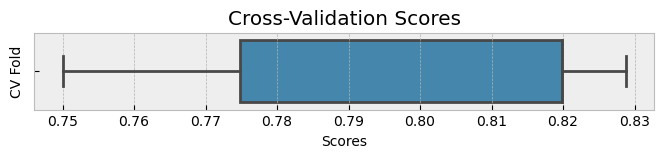

In [32]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_best_model, X_train, t_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Visualize cross-validation scores
plt.figure(figsize=(8, 1))
sns.boxplot(x=cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Scores')
plt.ylabel('CV Fold')
plt.show()

In [33]:
# Make predictions on test set
pred_test4 = xgb_best_model.predict(X_test)

print('XGB:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test4))
print ('F1_score:\n',f1_score(t_test, pred_test4, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test4))

XGB:
Training Accuracy: 
  0.75
F1_score:
 [0.76666667 0.63492063 0.89473684 0.70967742 0.80701754]
Confusion matrix:
[[23  3  0  1  0]
 [ 3 20  1  5  3]
 [ 1  1 17  1  0]
 [ 4  4  0 22  2]
 [ 2  3  0  1 23]]


## 5.) CNN (Model No. 5)

In [129]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train_corrected.npy')

X_train_full.shape, t_train_full.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

In [ ]:
del X_train_full, t_train_full
# free up space

In [ ]:

X_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0

X_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0

X_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0

X_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300,300,3]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
             metrics=['accuracy'])

In [11]:
model.fit(X_train, t_train, epochs=2, batch_size=32,
          validation_data=(X_val, t_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/2
127/127 [==============================] - 329s 3s/step - loss: 7.6946 - accuracy: 0.1004 - val_loss: 2.3032 - val_accuracy: 0.0991
Epoch 2/2
127/127 [==============================] - 324s 3s/step - loss: 2.3043 - accuracy: 0.0910 - val_loss: 2.3029 - val_accuracy: 0.1011


In [12]:
model.evaluate(X_test, t_test)

28/28 [==============================] - 13s 477ms/step - loss: 2.3029 - accuracy: 0.1011


[2.3029372692108154, 0.10112359374761581]

# Exporting Best Performing ML Model

In [29]:
import joblib

# Save best model pkl file
joblib.dump(xgb_best_model, 'best_pleth_ml_model_type2.pkl')

['best_pleth_ml_model_type2.pkl']

# Testing on Unseen Data

In [42]:
# Loading Unseen Data
data_unseen_type2 = np.load('data_unseen_type2.npy', allow_pickle=True)
labels_unseen_type2 = np.load('labels_unseen_type2.npy', allow_pickle=True)

print(data_unseen_type2.shape, labels_unseen_type2.shape)

(160, 19) (160,)


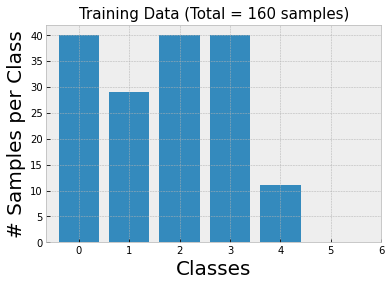

In [43]:
# Counting number samples per class
vals, counts = np.unique(labels_unseen_type2, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_unseen_type2.shape[0])+' samples)',size=15);

In [44]:
# Load the model from the file
loaded_model_type2 = joblib.load('best_pleth_ml_model_type2.pkl')

# Make predictions on unseen data
pred_unseen_type2 = loaded_model_type2.predict(data_unseen_type2)

print('XGB:')
print('Testing Accuracy: \n ',accuracy_score(labels_unseen_type2, pred_unseen_type2))
print ('F1_score:\n',f1_score(labels_unseen_type2, pred_unseen_type2, average=None))
print('Confusion matrix:')
print(confusion_matrix(labels_unseen_type2, pred_unseen_type2))

XGB:
Testing Accuracy: 
  0.9875
F1_score:
 [1.         0.98305085 1.         0.98734177 0.90909091]
Confusion matrix:
[[40  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 39  1]
 [ 0  1  0  0 10]]
